<a href="https://colab.research.google.com/github/thugge254/Image-Classification-Using-the-Logistic-regression-model-on-the-CIFAR10-Dataset/blob/main/Image_Classification_Using_the_Logistic_regression_model_on_the_CIFAR10_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification Using the Logistic regression model on the CIFAR10 Dataset

#### Import necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define the transformation
transform = transforms.ToTensor()

In [3]:
# Download CIFAR-10 training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170M/170M [00:10<00:00, 16.1MB/s]


#### CIFAR10 sample

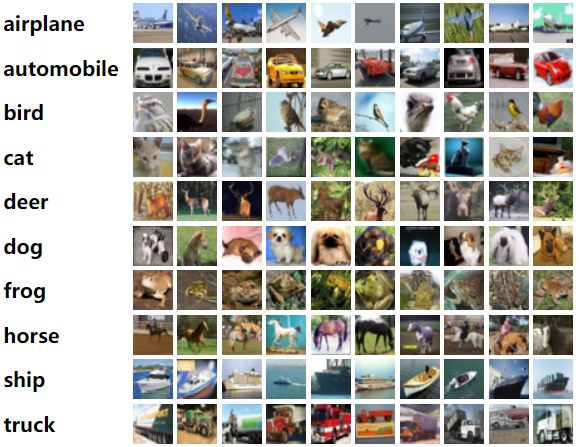

In [4]:
from PIL import Image
from IPython.display import display
img = Image.open('CIFAR_10_sample.png')
display(img)

#### Dataset Overview

The CIFAR-10 dataset is a widely used benchmark in machine learning for image classification tasks. It consists of 60,000 color images sized 32x32 pixels, divided into 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. Each class contains 6,000 images, with 50,000 used for training and 10,000 for testing. The images are in RGB format with three channels, making the dataset well-suited for evaluating deep learning models, especially convolutional neural networks (CNNs).

In [5]:
print(type(trainset))

<class 'torchvision.datasets.cifar.CIFAR10'>


In [6]:
trainset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [7]:
classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

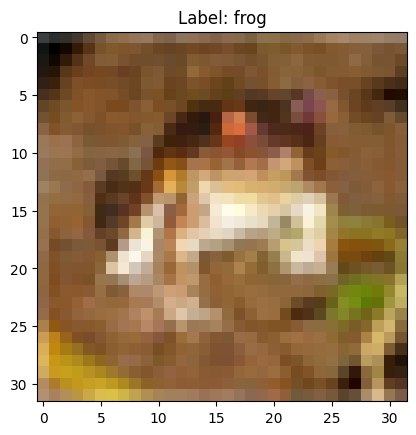

In [8]:
image, label = trainset[0]

# Convert from [C, H, W] → [H, W, C]
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.show()

In [9]:
img_tensor, label = trainset[0]
print(img_tensor.shape, label)

torch.Size([3, 32, 32]) 6


In [10]:
print(img_tensor[:,5:10,15:20])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.3843, 0.3686, 0.3804, 0.3255, 0.3451],
         [0.2902, 0.3961, 0.4118, 0.2549, 0.2275],
         [0.2824, 0.7098, 0.8196, 0.4902, 0.2667],
         [0.3373, 0.7961, 0.8510, 0.6353, 0.3922],
         [0.4039, 0.5961, 0.5804, 0.5529, 0.4745]],

        [[0.2549, 0.2431, 0.2471, 0.2196, 0.2275],
         [0.1608, 0.2000, 0.2196, 0.1451, 0.1412],
         [0.1216, 0.4000, 0.4980, 0.2980, 0.1569],
         [0.1529, 0.4157, 0.4275, 0.3529, 0.2275],
         [0.2078, 0.2745, 0.2510, 0.3098, 0.2941]],

        [[0.1059, 0.0824, 0.1255, 0.1490, 0.1412],
         [0.0667, 0.0824, 0.0902, 0.0627, 0.0745],
         [0.0667, 0.2706, 0.3176, 0.1843, 0.0902],
         [0.0588, 0.2196, 0.2431, 0.2784, 0.1922],
         [0.1020, 0.1294, 0.1451, 0.2392, 0.2235]]])
tensor(1.) tensor(0.)


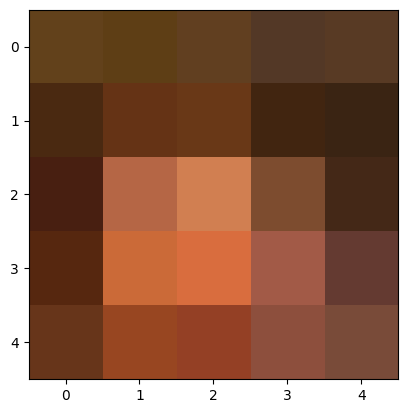

In [11]:
patch = img_tensor[:, 5:10, 15:20]

# Rearrange dimensions to [H, W, C]
patch = patch.permute(1, 2, 0)

plt.imshow(patch)

plt.show()


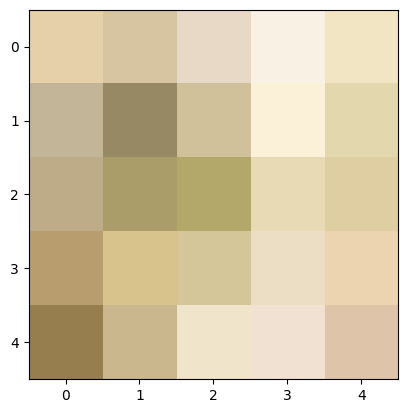

In [12]:
patch = img_tensor[:, 15:20, 20:25]

# Rearrange dimensions to [H, W, C]
patch = patch.permute(1, 2, 0)

plt.imshow(patch)

plt.show()

In [13]:
# Transform to convert images to tensors
transform = transforms.ToTensor()

In [14]:
len(trainset)

50000

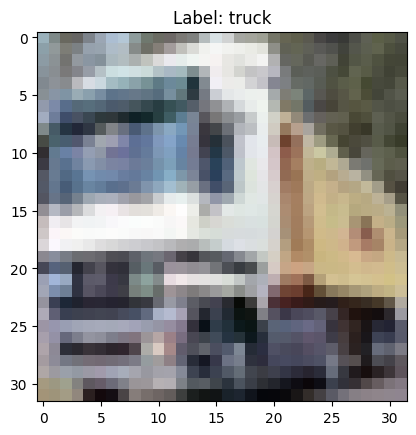

In [15]:
image, label = trainset[1]

# Convert from [C, H, W] → [H, W, C]
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.show()

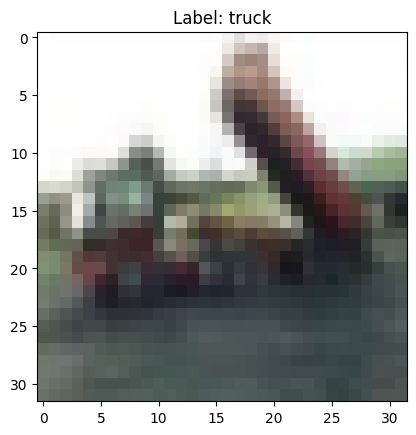

In [16]:
image, label = trainset[2]

# Convert from [C, H, W] → [H, W, C]
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.show()

### Training and Validation Datasets

In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(trainset, [40000, 10000])
len(train_ds), len(val_ds)

(40000, 10000)

In [18]:
import torch.nn as nn

input_size = 3 * 32 * 32  # For CIFAR-10 RGB images
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [19]:
print(model.bias.shape)

torch.Size([10])


In [20]:
model.bias

Parameter containing:
tensor([-0.0043, -0.0131,  0.0102,  0.0084, -0.0014,  0.0106,  0.0160,  0.0032,
         0.0009,  0.0176], requires_grad=True)

In [21]:
print(model.weight.shape)

torch.Size([10, 3072])


In [22]:
model.weight

Parameter containing:
tensor([[ 6.6082e-04, -7.5368e-03,  1.5215e-02,  ...,  1.3042e-02,
          5.5067e-03,  5.5330e-03],
        [-1.4310e-02,  5.5893e-03, -9.0292e-04,  ...,  1.0240e-05,
          4.8238e-03,  1.5539e-02],
        [ 5.3466e-03, -1.6897e-02,  8.3741e-03,  ...,  1.3932e-02,
         -2.1076e-03,  1.3344e-02],
        ...,
        [ 6.6725e-03,  1.1970e-02, -5.0902e-03,  ...,  7.3812e-03,
          6.5483e-03, -6.9995e-03],
        [ 2.1608e-03, -5.6560e-03, -5.2168e-03,  ...,  3.4903e-03,
          6.0203e-03,  5.0501e-03],
        [ 1.1235e-02, -2.9601e-03,  2.7342e-03,  ..., -1.2606e-02,
         -1.0891e-02, -9.5739e-03]], requires_grad=True)

In [23]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [24]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images.view(images.size(0), -1))
    break

tensor([9, 1, 0, 8, 1, 3, 2, 8, 1, 4, 1, 8, 8, 4, 5, 1, 4, 3, 1, 9, 5, 5, 5, 7,
        8, 6, 4, 1, 6, 8, 9, 6, 6, 2, 9, 3, 2, 1, 5, 2, 8, 3, 1, 3, 5, 5, 9, 0,
        2, 8, 8, 4, 2, 5, 0, 0, 4, 1, 1, 2, 3, 6, 3, 4, 7, 9, 9, 7, 6, 7, 5, 4,
        8, 3, 0, 5, 4, 8, 2, 8, 4, 9, 9, 3, 6, 3, 9, 2, 8, 5, 8, 1, 5, 1, 2, 3,
        2, 7, 7, 0, 6, 1, 1, 8, 4, 6, 1, 7, 8, 1, 8, 3, 9, 6, 7, 8, 3, 0, 3, 8,
        0, 3, 5, 9, 5, 2, 4, 1])
torch.Size([128, 3, 32, 32])


In [25]:
import torch.nn as nn

input_size = 32 * 32
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)


In [26]:
print(model.weight.shape)
model.weight

torch.Size([10, 1024])


Parameter containing:
tensor([[ 1.4663e-02, -2.6447e-03, -2.6643e-02,  ...,  3.4307e-03,
         -9.8299e-03, -9.5615e-03],
        [-8.9231e-04, -1.1772e-02, -2.7303e-02,  ...,  8.2573e-03,
         -2.1957e-02,  9.8647e-03],
        [ 1.5977e-02,  3.1066e-02,  7.7251e-03,  ...,  8.0895e-05,
          7.9566e-03, -8.5567e-03],
        ...,
        [-2.8386e-02,  1.7557e-02,  2.0877e-02,  ...,  5.0730e-03,
         -1.5453e-02,  5.0972e-03],
        [ 1.6092e-02, -2.0866e-04,  3.0338e-02,  ..., -2.0855e-02,
         -2.9526e-02, -6.5926e-03],
        [-2.9945e-02, -2.2494e-02, -1.3831e-02,  ..., -2.5639e-02,
          1.4932e-02,  2.4050e-02]], requires_grad=True)

In [27]:
images.shape

torch.Size([128, 3, 32, 32])

In [28]:
images.reshape(128, 3072).shape

torch.Size([128, 3072])

In [29]:
import torch.nn as nn

class Cifar10Model(nn.Module):
    def __init__(self):
        super().__init__()
        input_size = 3 * 32 * 32
        num_classes = 10
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1,3072)
        out = self.linear(xb)
        return out

model = Cifar10Model()


In [30]:
model.linear

Linear(in_features=3072, out_features=10, bias=True)

In [31]:
print(model.linear.weight.shape, model.linear.bias.shape )

torch.Size([10, 3072]) torch.Size([10])


In [32]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0085, -0.0073,  0.0046,  ...,  0.0081,  0.0030, -0.0059],
         [-0.0027,  0.0078,  0.0107,  ...,  0.0112,  0.0157,  0.0006],
         [ 0.0101, -0.0166,  0.0012,  ...,  0.0007, -0.0143,  0.0159],
         ...,
         [-0.0166, -0.0098,  0.0025,  ..., -0.0101, -0.0123, -0.0073],
         [ 0.0146, -0.0029,  0.0148,  ...,  0.0127,  0.0036,  0.0175],
         [ 0.0075,  0.0110, -0.0166,  ...,  0.0146,  0.0142,  0.0106]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0151, -0.0062,  0.0146,  0.0155,  0.0091,  0.0031,  0.0089, -0.0009,
          0.0040, -0.0113], requires_grad=True)]

In [33]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.2742, -0.3367,  0.0179, -0.3045,  0.0117,  0.0877,  0.3805,  0.0857,
         -0.2357, -0.2483],
        [ 0.0595,  0.0383,  0.1809, -0.0653,  0.0324,  0.2549,  0.3765,  0.2676,
         -0.0447, -0.1409]])


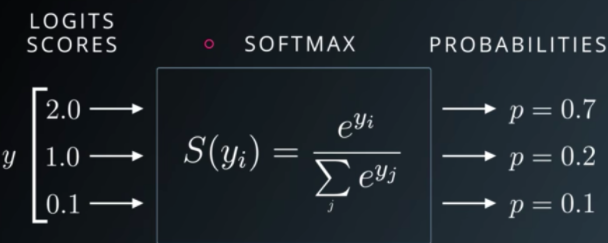

In [34]:
img = Image.open('SOFTMAX.png')
display(img)

In [35]:
import torch.nn.functional as F

In [36]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1314, 0.0713, 0.1017, 0.0737, 0.1011, 0.1090, 0.1461, 0.1088, 0.0789,
         0.0779],
        [0.0952, 0.0932, 0.1075, 0.0840, 0.0927, 0.1158, 0.1307, 0.1172, 0.0858,
         0.0779]])
Sum:  0.9999999403953552


In [37]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 6, 6, 6, 6, 0, 6, 5, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        7, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 0, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 5, 6, 0,
        6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6,
        6, 6, 6, 7, 6, 6, 6, 6])
tensor([0.1461, 0.1307, 0.1457, 0.1507, 0.1207, 0.1485, 0.1447, 0.1305, 0.1600,
        0.1555, 0.1416, 0.2103, 0.2042, 0.1756, 0.2142, 0.1610, 0.1330, 0.1896,
        0.1393, 0.1591, 0.1393, 0.1583, 0.1336, 0.1538, 0.1581, 0.1776, 0.1687,
        0.1837, 0.1835, 0.1315, 0.1378, 0.2011, 0.1705, 0.1548, 0.1445, 0.1394,
        0.1388, 0.1546, 0.1541, 0.1536, 0.1640, 0.1554, 0.1732, 0.1611, 0.1255,
        0.1493, 0.1301, 0.1424, 0.1778, 0.1638, 0.1619, 0.1315, 0.1385, 0.1614,
        0.1263, 0.1541, 0.1479, 0.1886, 0.1542, 0.1583, 0.1220, 0.1456, 0.1572,
       

In [38]:
outputs[:2]

tensor([[ 0.2742, -0.3367,  0.0179, -0.3045,  0.0117,  0.0877,  0.3805,  0.0857,
         -0.2357, -0.2483],
        [ 0.0595,  0.0383,  0.1809, -0.0653,  0.0324,  0.2549,  0.3765,  0.2676,
         -0.0447, -0.1409]], grad_fn=<SliceBackward0>)

In [39]:
images.shape

torch.Size([128, 3, 32, 32])